## Imports

In [1]:
import os
import sys
import sklearn
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import midiutil
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import accuracy_score
from midiutil import MIDIFile

## Data

In [2]:
# Load in data

in_file_path= os.path.join(os.getcwd(), 'Data//Processed', 'input.txt')
out_file_path= os.path.join(os.getcwd(), 'Data//Processed', 'output.txt')

inp = pd.read_csv(in_file_path,sep=",",header=None)
out = pd.read_csv(out_file_path,sep=",",header=None)

out_save = out.copy()

In [3]:
out.shape

(41046, 88)

In [4]:
out_fixed=out.copy()
out_fixed=out_fixed.astype(np.int)
out =pd.DataFrame(out_fixed)

In [5]:
np.where(np.sum(out,axis=1)==2)

(array([15281, 15282, 15283, ..., 23416, 23417, 23418]),)

In [6]:
display(inp.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,384,385,386,387,388,389,390,391,392,393
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.374088,0.180725,0.028983,-0.099311,-0.206496,-0.281052,-0.299558,-0.246199,-0.143624,-0.029787
4,8.341131,8.660773,12.070010,13.950991,14.588702,14.335634,13.344617,11.937556,11.273704,10.447790,...,-2.942874,0.844022,3.603425,1.087358,-2.086987,-1.463531,-0.830736,1.595371,1.194545,0.519278
5,10.333080,4.772930,11.918969,14.253366,14.754454,12.806597,12.672321,12.319128,12.258269,12.953641,...,1.227427,-0.481731,-3.807462,1.298765,0.591249,-0.318566,1.887330,-0.019180,-0.126595,-1.815860
6,6.893919,9.079939,13.855565,13.843465,13.290117,14.032422,13.523619,13.151092,13.600449,12.714973,...,0.522077,1.044776,0.167370,-1.572321,0.351705,0.343155,0.182750,-0.591479,0.840371,1.699092
7,4.162915,9.316605,11.448648,9.823874,12.470953,12.289130,13.033843,11.195500,12.148137,11.576314,...,0.977995,1.358075,-0.028283,-0.154130,-0.329405,-0.696072,-1.303249,0.581279,0.416355,1.015662
8,7.225209,8.923570,8.264386,8.841744,11.855740,11.407793,10.645953,12.020951,10.191635,10.246011,...,1.735500,2.132174,-0.006459,-2.845334,0.093793,1.040261,1.294222,1.180615,0.169893,-0.730532
9,10.982247,8.115265,9.180094,10.174972,12.835152,13.823807,14.926485,11.802881,10.752745,11.982655,...,-0.486771,-1.405318,0.670281,0.427305,0.294566,0.106973,-0.630326,-0.725471,-0.871405,-1.525883


In [7]:
display(out.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Get some info

In [8]:
count_empty = np.where(np.sum(out,axis=1)==0)[0].shape[0]
count_not_empty = out.shape[0] - count_empty
print('Empty instances:',count_empty)
print('Not empty instances:',count_not_empty)


Empty instances: 28306
Not empty instances: 12740


In [9]:
np.where(np.sum(out,axis=1)==2)

(array([15281, 15282, 15283, ..., 23416, 23417, 23418]),)

In [10]:
count_notes = np.sum(out,axis=1)
count_notes_hot = pd.get_dummies(count_notes)
out_hot=pd.concat([out,count_notes_hot],axis=1,ignore_index=True)
display(out_hot.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
empty = out_hot.iloc[:,88].get_values()
empty_idx = np.where(empty==1)[0]
not_empty_idx = np.where(empty==0)[0]

# How many empty?
num_empty = 10000

# Get random empty index
ii = random.sample(range(0,empty_idx.shape[0]),num_empty)
rand_empty_idx = empty_idx[ii]


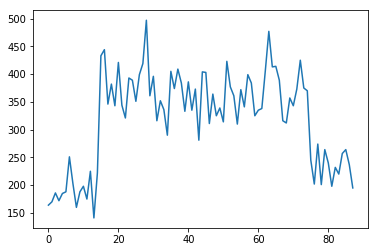

In [12]:
plt.plot(np.sum(out.iloc[:,0:out.shape[1]],axis=0))

In [13]:
empty.shape

(41046,)

In [14]:
# Split no note info
X_n = pd.concat([inp.iloc[not_empty_idx,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_n = pd.concat([out.iloc[not_empty_idx,:],out.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(X_n,y_n,train_size=0.95,test_size=0.05)
print('X_train_n shape:',X_train_n.shape)
print('y_train_n shape:',y_train_n.shape)
print('X_test_n shape:',X_test_n.shape)
print('y_test_n shape:',y_test_n.shape)

X_train_n shape: (16853, 394)
y_train_n shape: (16853, 88)
X_test_n shape: (887, 394)
y_test_n shape: (887, 88)


In [15]:
# Split with empty
X_e = pd.concat([inp.iloc[not_empty_idx,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_e = pd.concat([out_hot.iloc[not_empty_idx,0:89],out_hot.iloc[rand_empty_idx,0:89]],axis=0,ignore_index=True)
X_train_e,X_test_e,y_train_e,y_test_e = train_test_split(X_e,y_e,train_size=0.95,test_size=0.05)
print('X_train_e shape:',X_train_e.shape)
print('y_train_e shape:',y_train_e.shape)
print('X_test_e shape:',X_test_e.shape)
print('y_test_e shape:',y_test_e.shape)

X_train_e shape: (16853, 394)
y_train_e shape: (16853, 89)
X_test_e shape: (887, 394)
y_test_e shape: (887, 89)


In [16]:
# Split note one_hot
X_h = pd.concat([inp.iloc[not_empty_idx,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_h = pd.concat([out_hot.iloc[not_empty_idx,:],out_hot.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
X_train_h,X_test_h,y_train_h,y_test_h = train_test_split(X_h,y_h,train_size=0.95,test_size=0.05)
print('X_train_h shape:',X_train_h.shape)
print('y_train_h shape:',y_train_h.shape)
print('X_test_h shape:',X_test_h.shape)
print('y_test_h shape:',y_test_h.shape)

X_train_h shape: (16853, 394)
y_train_h shape: (16853, 96)
X_test_h shape: (887, 394)
y_test_h shape: (887, 96)


## Training

In [17]:
# Single layer, no note info
model_s_n = keras.Sequential()
model_s_n.add(keras.layers.Dense(units=out.shape[1], activation='relu',input_dim=X_n.shape[1]))
model_s_n.add(keras.layers.Dense(units=out.shape[1], activation='softmax'))
model_s_n.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_n.fit(X_train_n,y_train_n,epochs=50, batch_size=32)
print('Done')

Epoch 1/50
16853/16853 [==============================] - 2s 92us/step - loss: 6.5173 - acc: 0.1440
Epoch 2/50
16853/16853 [==============================] - 1s 74us/step - loss: 4.9971 - acc: 0.3929
Epoch 3/50
16853/16853 [==============================] - 1s 75us/step - loss: 4.3132 - acc: 0.4489
Epoch 4/50
16853/16853 [==============================] - 1s 75us/step - loss: 3.9912 - acc: 0.4679
Epoch 5/50
16853/16853 [==============================] - 1s 75us/step - loss: 3.7860 - acc: 0.4747
Epoch 6/50
16853/16853 [==============================] - 1s 76us/step - loss: 3.6406 - acc: 0.4780
Epoch 7/50
16853/16853 [==============================] - 1s 76us/step - loss: 3.5273 - acc: 0.4839
Epoch 8/50
16853/16853 [==============================] - 1s 75us/step - loss: 3.4515 - acc: 0.4819
Epoch 9/50
16853/16853 [==============================] - 1s 83us/step - loss: 3.3790 - acc: 0.4849
Epoch 10/50
16853/16853 [==============================] - 1s 78us/step - loss: 3.3214 - acc: 0.4841

In [18]:
# Single layer, with empty
model_s_e = keras.Sequential()
model_s_e.add(keras.layers.Dense(units=out.shape[1]+1, activation='relu',input_dim=X_e.shape[1]))
model_s_e.add(keras.layers.Dense(units=out.shape[1]+1, activation='softmax'))
model_s_e.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_e.fit(X_train_e,y_train_e,epochs=50, batch_size=32)
print('Done')

Epoch 1/50
16853/16853 [==============================] - 1s 88us/step - loss: 7.3055 - acc: 0.3753
Epoch 2/50
16853/16853 [==============================] - 1s 74us/step - loss: 5.3126 - acc: 0.6198
Epoch 3/50
16853/16853 [==============================] - 1s 72us/step - loss: 4.5056 - acc: 0.6780
Epoch 4/50
16853/16853 [==============================] - 1s 73us/step - loss: 4.1645 - acc: 0.6980
Epoch 5/50
16853/16853 [==============================] - 1s 74us/step - loss: 3.9309 - acc: 0.7103
Epoch 6/50
16853/16853 [==============================] - 1s 74us/step - loss: 3.7844 - acc: 0.7195
Epoch 7/50
16853/16853 [==============================] - 1s 73us/step - loss: 3.6644 - acc: 0.7218
Epoch 8/50
16853/16853 [==============================] - 1s 80us/step - loss: 3.5793 - acc: 0.7243
Epoch 9/50
16853/16853 [==============================] - 1s 72us/step - loss: 3.5059 - acc: 0.7275
Epoch 10/50
16853/16853 [==============================] - 1s 73us/step - loss: 3.4488 - acc: 0.7309

In [19]:
# Single layer, one hot encoding for notes
model_s_h = keras.Sequential()
model_s_h.add(keras.layers.Dense(units=y_h.shape[1], activation='relu',input_dim=X_h.shape[1]))
model_s_h.add(keras.layers.Dense(units=y_h.shape[1], activation='softmax'))
model_s_h.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_h.fit(X_train_h,y_train_h,epochs=50, batch_size=32)

Epoch 1/50
16853/16853 [==============================] - 2s 91us/step - loss: 10.1546 - acc: 0.1908
Epoch 2/50
16853/16853 [==============================] - 1s 72us/step - loss: 7.8885 - acc: 0.4495
Epoch 3/50
16853/16853 [==============================] - 1s 75us/step - loss: 6.9651 - acc: 0.5223
Epoch 4/50
16853/16853 [==============================] - 1s 75us/step - loss: 6.5232 - acc: 0.5293
Epoch 5/50
16853/16853 [==============================] - 1s 73us/step - loss: 6.2700 - acc: 0.5404
Epoch 6/50
16853/16853 [==============================] - 1s 71us/step - loss: 6.0991 - acc: 0.5441
Epoch 7/50
16853/16853 [==============================] - 1s 76us/step - loss: 5.9349 - acc: 0.5510
Epoch 8/50
16853/16853 [==============================] - 1s 76us/step - loss: 5.8233 - acc: 0.5533
Epoch 9/50
16853/16853 [==============================] - 1s 84us/step - loss: 5.7247 - acc: 0.5533
Epoch 10/50
16853/16853 [==============================] - 1s 76us/step - loss: 5.6505 - acc: 0.554

In [59]:
y_pred_n = model_s_n.predict(X_test_n,batch_size=32)
y_pred_e = model_s_e.predict(X_test_e,batch_size=32)
y_pred_h = model_s_h.predict(X_test_h,batch_size=32)
threshold = 0.2

In [29]:
inp_test_path = os.path.join(os.getcwd(),'Data/Processed/Testing/input.txt')
inp_test=pd.read_csv(inp_test_path,sep=',',header=None)

y_pred_n = model_s_n.predict(inp_test,batch_size=8)
y_pred_e = model_s_e.predict(inp_test,batch_size=8)
y_pred_h = model_s_h.predict(inp_test,batch_size=8)
threshold = 0.2

In [21]:
print(y_pred_n.shape)
print(y_pred_e.shape)
print(y_pred_h.shape)


(51, 88)
(51, 89)
(51, 96)


## Testing

In [37]:
# General Accuracy
def general_acc(y_pred,y_true):
    j=0
    for i in range(y_true.shape[0]):
        if (np.array_equal(y_pred[i,:],y_true[i,:])):
            j=j+1
    return (j/y_true.shape[0])

In [38]:
# Empty Accuracy
def empty_acc(y_pred,y_true):
    j=0
    k=0
    z=np.zeros(88)
    for i in range(y_true.shape[0]):
        if (np.array_equal(y_pred[i,:],z)):
            k=k+1
            if (np.array_equal(y_true[i],z)):
                j=j+1
    return (j/k)

In [39]:
# Non Empty Accuracy
def non_empty_acc(y_pred,y_true):
    j=0
    k=0
    z=np.zeros(88)
    for i in range(y_true.shape[0]):
        if (not np.array_equal(y_pred[i,:],z)):
            k=k+1
            if (np.array_equal(y_true[i,:],y_pred[i,:])):
                j=j+1
    return (j/k)

In [40]:
# Number of Notes Accuracy
def note_num_acc(y_pred,y_true):
    j=0
    a=np.sum(y_pred,axis=1)
    b=np.sum(y_true,axis=1)
    for i in range(y_true.shape[0]):
        if (a[i]==b[i]):
            j=j+1
    return (j/y_true.shape[0])

In [41]:
# Number of Notes Accuracy by number
def note_num_acc_specific(y_pred,y_true):
    j=0
    a=np.sum(y_pred,axis=1)
    b=np.sum(y_true,axis=1)
    c=np.unique(np.sum(y_pred,axis=1))
    d=np.unique(np.sum(y_true,axis=1))
    e=np.zeros(d.shape[0])
    f=np.zeros(d.shape[0])
    for i in range(d.shape[0]):
        f[i]=np.where(a==i)[0].shape[0]
        if (f[i]==0):
            f[i]=1
    for i in range(y_true.shape[0]):
        num_pred_notes = int(a[i])
        if (num_pred_notes==b[i]):
            e[num_pred_notes]=e[num_pred_notes]+1
    for i in range(d.shape[0]):
        e[i]=e[i]/f[i]
    return e

In [42]:
# Number of right notes when right
def same_num_note_acc(y_pred,y_true):
    j=0
    k=0
    a=np.sum(y_pred,axis=1)
    b=np.sum(y_true,axis=1)
    for i in range(y_true.shape[0]):
        if (a[i]==b[i]):
            k=k+1
            if (np.array_equal(y_pred[i,:],y_true[i,:])):
                j=j+1
    return (j/k)

In [43]:
# Number of correct notes in prediction
def num_notes_correct_acc1(y_pred,y_true):
    j=0
    for i in range(y_true.shape[0]):
        a=np.where(y_pred[i,:]==1)[0]
        b=np.where(y_true[i,:]==1)[0]
        if (a.shape[0]!=0):
            c = np.intersect1d(a,b).shape[0]
            j=j+c/(a.shape[0])
    return (j/y_true.shape[0])

In [44]:
# Number of correct notes in prediction
def num_notes_correct_acc2(y_pred,y_true):
    j=0
    for i in range(y_true.shape[0]):
        a=np.where(y_pred[i,:]==1)[0]
        b=np.where(y_true[i,:]==1)[0]
        if (b.shape[0]!=0):
            c = np.intersect1d(a,b).shape[0]
            j=j+c/(b.shape[0])
    return (j/y_true.shape[0])

## Method 1

In [45]:
y_note_pred_n = y_pred_n.copy()
y_note_pred_n[y_note_pred_n<threshold]=0
y_note_pred_n[y_note_pred_n>=threshold]=1
y_note_test_n=y_test_n.get_values()

In [46]:
general_acc_n = general_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('General Accuracy:',general_acc_n)

IndexError: index 51 is out of bounds for axis 0 with size 51

In [88]:
empty_acc_n=empty_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Empty Accuracy:',empty_acc_n)

Empty Accuracy: 0.5097087378640777


In [89]:
non_empty_acc_n=non_empty_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Non Empty Accuracy:', non_empty_acc_n)

Non Empty Accuracy: 0.5259638080251771


In [90]:
note_num_acc_n=note_num_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Note Number Accuracy:',note_num_acc_n)

Note Number Accuracy: 0.5556768558951966


In [91]:
note_num_acc_specific_n = note_num_acc_specific(y_pred=y_note_pred_n,y_true=y_note_test_n)
for i in range(note_num_acc_specific_n.shape[0]):
    print('Note Number Accuracy of',i,':',note_num_acc_specific_n[i])

Note Number Accuracy of 0 : 0.5097087378640777
Note Number Accuracy of 1 : 0.6268580215274219
Note Number Accuracy of 2 : 0.34929078014184395
Note Number Accuracy of 3 : 0.07407407407407407
Note Number Accuracy of 4 : 0.0
Note Number Accuracy of 5 : 0.0
Note Number Accuracy of 6 : 0.0
Note Number Accuracy of 7 : 0.0


In [92]:
same_num_note_acc_n=same_num_note_acc(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Same Number of Notes, Accuracy:',same_num_note_acc_n)

Same Number of Notes, Accuracy: 0.9443352979698756


In [93]:
num_notes_correct_acc_n1=num_notes_correct_acc1(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Number of Notes correct in Prediction out of Prediction:',num_notes_correct_acc_n1)

Number of Notes correct in Prediction out of Prediction: 0.8190805434255216


In [94]:
num_notes_correct_acc_n2=num_notes_correct_acc2(y_pred=y_note_pred_n,y_true=y_note_test_n)
print('Number of Notes correct in Prediction out of True:',num_notes_correct_acc_n2)

Number of Notes correct in Prediction out of True: 0.647364316905802


## Method 2

In [51]:
a = y_pred_e.copy()
threshold_pred_e = np.zeros_like(a)
threshold_pred_e[np.arange(len(a)),a.argmax(1)]=1
y_note_pred_e = threshold_pred_e[:,0:88]
y_note_test_e = y_test_e.iloc[:,0:88].get_values()

In [96]:
general_acc_e = general_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('General Accuracy:',general_acc_e)

General Accuracy: 0.5334788937409025


In [97]:
empty_acc_e=empty_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Empty Accuracy:',empty_acc_e)

Empty Accuracy: 0.7364016736401674


In [98]:
non_empty_acc_e=non_empty_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Non Empty Accuracy:', non_empty_acc_e)

Non Empty Accuracy: 0.5141490633718613


In [99]:
note_num_acc_e=note_num_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Note Number Accuracy:',note_num_acc_e)

Note Number Accuracy: 0.5858806404657934


In [100]:
note_num_acc_specific_e = note_num_acc_specific(y_pred=y_note_pred_e,y_true=y_note_test_e)
for i in range(note_num_acc_specific_e.shape[0]):
    print('Note Number Accuracy of',i,':',note_num_acc_specific_e[i])

Note Number Accuracy of 0 : 0.7364016736401674
Note Number Accuracy of 1 : 0.5715424471901156
Note Number Accuracy of 2 : 0.0
Note Number Accuracy of 3 : 0.0
Note Number Accuracy of 4 : 0.0
Note Number Accuracy of 5 : 0.0
Note Number Accuracy of 6 : 0.0
Note Number Accuracy of 7 : 0.0


In [101]:
same_num_note_acc_e=same_num_note_acc(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Same Number of Notes, Accuracy:',same_num_note_acc_e)

Same Number of Notes, Accuracy: 0.9105590062111801


In [102]:
num_notes_correct_acc_e1=num_notes_correct_acc1(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Number of Notes correct in Prediction out of Prediction:',num_notes_correct_acc_e1)

Number of Notes correct in Prediction out of Prediction: 0.8336972343522562


In [103]:
num_notes_correct_acc_e2=num_notes_correct_acc2(y_pred=y_note_pred_e,y_true=y_note_test_e)
print('Number of Notes correct in Prediction out of Prediction:',num_notes_correct_acc_e2)

Number of Notes correct in Prediction out of Prediction: 0.5898818188119501


## Method 3

In [30]:
threshold_pred_h = y_pred_h.copy()[:,0:88]
num_pred_prob = y_pred_h.copy()
for i in range(y_pred_h.shape[0]):
    a = num_pred_prob[:,88:num_pred_prob.shape[1]]
    num_pred=count_notes_hot.columns[np.argmax(a[i,:])]
    pred_idx = np.flip(np.argsort(threshold_pred_h[i,:]))[0:num_pred]
    b=np.zeros(88)
    if (num_pred==0):
        threshold_pred_h[i,:]=b
    else:
        b[pred_idx]=1
        threshold_pred_h[i,:]=b
        
y_note_pred_h = threshold_pred_h[:,0:88]
y_note_test_h = y_test_h.iloc[:,0:88].get_values()

In [105]:
general_acc_h = general_acc(y_pred=threshold_pred_h[:,0:88],y_true=y_test_h.iloc[:,0:88].get_values())
print('General Accuracy:',general_acc_h)

General Accuracy: 0.549490538573508


In [106]:
empty_acc_h=empty_acc(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Empty Accuracy:',empty_acc_h)

Empty Accuracy: 0.7727272727272727


In [107]:
non_empty_acc_h=non_empty_acc(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Non Empty Accuracy:', non_empty_acc_h)

Non Empty Accuracy: 0.5300632911392406


In [108]:
note_num_acc_h=note_num_acc(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Note Number Accuracy:',note_num_acc_h)

Note Number Accuracy: 0.6885007278020379


In [109]:
note_num_acc_specific_h = note_num_acc_specific(y_pred=y_note_pred_h,y_true=y_note_test_h)
for i in range(note_num_acc_specific_h.shape[0]):
    print('Note Number Accuracy of',i,':',note_num_acc_specific_h[i])

Note Number Accuracy of 0 : 0.7727272727272727
Note Number Accuracy of 1 : 0.8733624454148472
Note Number Accuracy of 2 : 0.503030303030303
Note Number Accuracy of 3 : 0.3770491803278688
Note Number Accuracy of 4 : 0.3467741935483871
Note Number Accuracy of 5 : 0.29914529914529914
Note Number Accuracy of 6 : 0.3974358974358974
Note Number Accuracy of 7 : 0.5087719298245614


In [110]:
same_num_note_acc_h=same_num_note_acc(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Same Number of Notes, Accuracy:',same_num_note_acc_h)

Same Number of Notes, Accuracy: 0.7980972515856237


In [111]:
num_notes_correct_acc_h1=num_notes_correct_acc1(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Number of Notes correct in Prediction out of Prediction:',num_notes_correct_acc_h1)

Number of Notes correct in Prediction out of Prediction: 0.718221910307063


In [112]:
num_notes_correct_acc_h2=num_notes_correct_acc2(y_pred=y_note_pred_h,y_true=y_note_test_h)
print('Number of Notes correct in Prediction out of Prediction:',num_notes_correct_acc_h2)

Number of Notes correct in Prediction out of Prediction: 0.7176102100228743


## Postprocessing

In [31]:
tbin_path = os.path.join(os.getcwd(),'Data/Processed/Testing/tbin.txt')
a=pd.read_csv(tbin_path,sep=',',header=None)
b=np.zeros(1)
tbin=np.append(b,a)

In [32]:
track    = 0
channel  = 0
time     = 0    # In beats
duration = 1    # In beats
tempo    = 60   # In BPM
volume   = 100  # 0-127, as per the MIDI standard
MyMIDI = MIDIFile(1)
MyMIDI.addTempo(track, time, tempo)

In [37]:
time_len = np.diff(tbin)[1]
time=0
for i in range(tbin.shape[0]):
    if (i==0):
        time=0
    elif (i==1):
        time = time+np.diff(tbin)[0]
    else:
        time=time+time_len
    midi_notes= np.where(y_note_pred_h[i,:]==1)[0]
    for j in range(midi_notes.shape[0]):
        if (i!=tbin.shape[0]-1):
            next_midi_notes=np.where(y_note_pred_h[i+1,:]==1)[0]
            if (np.isin(next_midi_notes, midi_notes[j]).any()):
                MyMIDI.addNote(track,channel,midi_notes[j],time,time_len*2,volume)
                del
            else:
                MyMIDI.addNote(track,channel,midi_notes[j],time,time_len,volume)
    

In [38]:
with open("test.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

In [72]:
np.diff(tbin)[1]

0.17575963718820858

In [35]:
time_len = np.diff(tbin)[1]
time=0
for i in range(tbin.shape[0]):
    print(np.where(y_note_pred_h[i,:]==1)[0])
    

[]
[15]
[27]
[43]
[43]
[57]
[56]
[56]
[]
[60]
[60]
[46]
[]
[56]
[56]
[55]
[16]
[15 27 32 66]
[36]
[15 27 32 44 62 63 66]
[32 62 64 66]
[27]
[27 39 40 63]
[39]
[27 32 40 62 63 64 65]
[32]
[53]
[53]
[55]
[55]
[39]
[31]
[43]
[43]
[27]
[43]
[46]
[27]
[38]
[60]
[46]
[56]
[55]
[15 32 36 40 62 63 64]
[15 32 36 63]
[15 32 36 60]
[62]
[32]
[55]
[79]
[62]
[27 32 62 65]
[]
[]
[]
[]
[]
[]
